### Preprocesamiento

In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import StemmerTokenizer, make_BoW_preprocess

tokenizador = StemmerTokenizer()
preprocessing = make_BoW_preprocess(tokenizador,'comment',max_ngram=2,min_ngram=1,mindf=5)

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

bog_pipeline = Pipeline(
    [("Preprocessing", preprocessing),
    # ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

### Cargar datos

In [3]:
from utils.cargar import df_caso
from utils.preprocesamiento import process_df

caso = 'laura'
df = df_caso(caso)

df = process_df(df,'comment','sel',verbose=True)

df = df.drop(columns=['user_id','team_id','gender','df','title','opt_left','opt_right','max_num','phase','time','curso'])

df.head()

549 rows found with non string elements for column comment (11.03%)
Deleting 362 columns for which max target value is over 7 (7.27%)
4067 available rows after processing


,sel,comment
id,,
4580,4,Depende del nivel de impacto del proyecto en p...
4582,2,No marco 1 porque de quedarse podrían haber ay...
4588,1,Creo que ninguna persona debería trabajar en u...
4589,6,"Ya que Laura, informó su error, se hizo respon..."
4593,2,A pesar de que por parte de la empresa se seña...


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

In [5]:
bog_pipeline.fit(df_train,y_train)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=5,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f4047f91c10>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [6]:
from sklearn.metrics import classification_report

y_pred = bog_pipeline.predict(df_test)

print("Resultados clasificador Naive-Bayes multinomial")
print(classification_report(y_test, y_pred))

Resultados clasificador Naive-Bayes multinomial
              precision    recall  f1-score   support

           1       0.52      0.61      0.56       171
           2       0.41      0.53      0.46       251
           3       0.39      0.32      0.35       164
           4       0.48      0.39      0.43       135
           5       0.45      0.30      0.36       153
           6       0.65      0.66      0.66       143

    accuracy                           0.48      1017
   macro avg       0.48      0.47      0.47      1017
weighted avg       0.47      0.48      0.47      1017



In [7]:
"""class_index = 0  # Index of the class you want to rename

report_lines = classification_report(y_test, y_pred).strip().split('\n')
report_lines[2 + class_index] = report_lines[2 + class_index].replace('1', 'New Class Name',1)
report_lines[2 + 1] = report_lines[2 + 1].replace('2', '\t\t(2)')

modified_report = '\n'.join(report_lines)

print(modified_report)""";

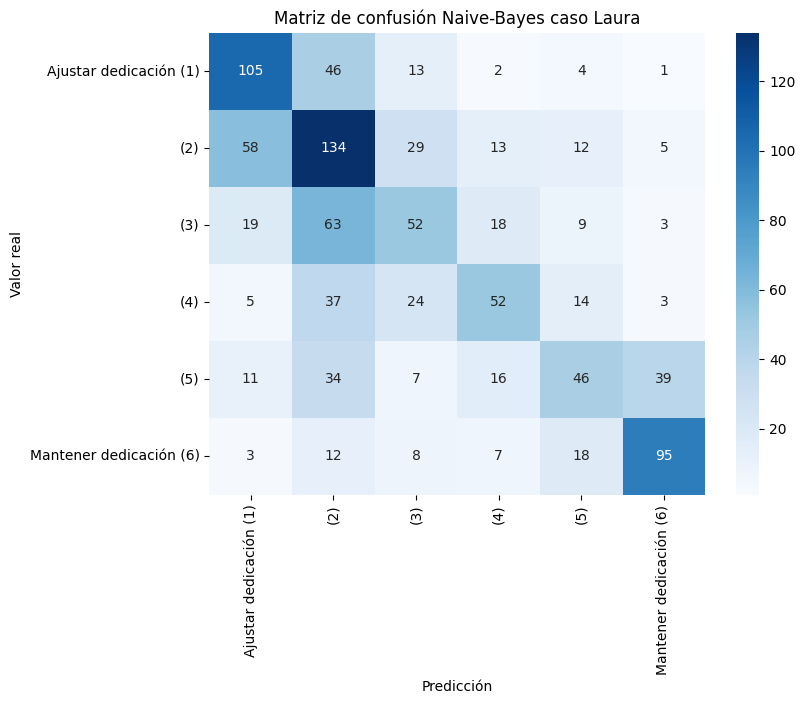

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Example class labels
class_labels = ['Ajustar dedicación (1)', '(2)', '(3)', '(4)', '(5)', 'Mantener dedicación (6)']

# Convert confusion matrix to NumPy array
cm_array = np.array(cm)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_array, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión Naive-Bayes caso Laura')

# Show the plot
plt.show()

In [9]:
df.loc[(df['sel']==2) | (df['sel']==3),'sel'] = 1
df.loc[(df['sel']==4) | (df['sel']==5),'sel'] = 6

df.head()

,sel,comment
id,,
4580,6,Depende del nivel de impacto del proyecto en p...
4582,1,No marco 1 porque de quedarse podrían haber ay...
4588,1,Creo que ninguna persona debería trabajar en u...
4589,6,"Ya que Laura, informó su error, se hizo respon..."
4593,1,A pesar de que por parte de la empresa se seña...


In [10]:
df['sel'].value_counts()

1    2343
6    1724
Name: sel, dtype: int64

In [11]:
df_train_binary, df_test_binary, y_train_binary, y_test_binary = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

In [12]:
bog_pipeline_binary = Pipeline(
    [("Preprocessing", preprocessing),
    # ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

In [13]:
bog_pipeline_binary.fit(df_train_binary,y_train_binary)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=5,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f4047f91c10>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [14]:
y_pred_binary = bog_pipeline_binary.predict(df_test_binary)

print("Resultados clasificador Naive-Bayes multinomial (binario)")
print(classification_report(y_test_binary, y_pred_binary))

Resultados clasificador Naive-Bayes multinomial (binario)
              precision    recall  f1-score   support

           1       0.76      0.89      0.82       586
           6       0.80      0.61      0.70       431

    accuracy                           0.77      1017
   macro avg       0.78      0.75      0.76      1017
weighted avg       0.78      0.77      0.77      1017



### Probabilidad por palabra/n_grama en Naive-Bayes

Comenzamos por extraer el vectorizador

In [15]:
vectorizer = bog_pipeline.named_steps['Preprocessing'].transformers_[0][1]
vectorizer

CountVectorizer(min_df=5, ngram_range=(1, 2),
                tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f3febac3b50>)

In [16]:
def get_probs(token,clf,df_base,column_text):
    sample = df_base.sample()
    sample[column_text] = token
    return tuple(clf.predict_proba(sample)[0])

In [17]:
prob_1, prob_6 = [], []

for ngram in vectorizer.get_feature_names_out():
    probs = get_probs(ngram,bog_pipeline_binary,df_test_binary,'comment')
    prob_1.append(probs[0])
    prob_6.append(probs[1])

In [18]:
op_left, op_right = 'Ajustar dedicación', 'Mantener dedicación (6)'

def get_top_k_ngrams(k,prob_left,prob_right,str_left,str_right,verbose=True):
    idx_left = sorted(range(len(prob_left)), key=lambda x: prob_left[x])[-k:]
    idx_right = sorted(range(len(prob_right)), key=lambda x: prob_right[x])[-k:]

    dic_left = {vectorizer.get_feature_names_out()[i]:prob_left[i] for i in idx_left}
    dic_right = {vectorizer.get_feature_names_out()[i]:prob_right[i] for i in idx_right}

    if verbose:
        print("Top features '{}':".format(str_left))
        for key, value in dic_left.items():
            print(key, value)
        print("\nTop features '{}':".format(str_right))
        for key, value in dic_right.items():
            print(key, value)
    
    return dic_left, dic_right

In [19]:
get_top_k_ngrams(10,prob_1,prob_6,op_left,op_right);

Top features 'Ajustar dedicación':
creenci personal 0.9930826207487318
di cuent 0.9938898148414608
dañ planet 0.9957989175689901
deb ajust 0.9959018718737527
dañin ecosistem 0.9963606951057531
dañ irrevers 0.9969888130765258
influ postur 0.997744125901167
pregunt 3 0.9980557353628892
ajust dedic 0.9982531510699769
calent global 0.9993558391263405

Top features 'Mantener dedicación (6)':
dieron oportun 0.9968696529804326
record error 0.9968813366578984
error oportun 0.9974488305213487
correg error 0.9979665540958698
acept error 0.9980537469266991
comet error 0.9987002688501334
manej frustracion 0.9990863408970314
escap error 0.9991015235398999
oportun enmend 0.99956202769037
enmend error 0.9997999666601013
